In [457]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
from pprint import pprint
plt.style.use("seaborn")

In [158]:
# Authenticate to Twitter
consumer_key = 'HiBsRolOZ8IUJMe0kpjh2uKT8'
consumer_secret = 'BiGGs2eW25QLrqd0IMxQkIKUQZNZ154CIcvZHMUCygt1KreAak'
ACCESS_TOKEN = "580962878-4QAHKg5bdSEqCkr8OK9CMDMRUwZbOJEwqOouLpYu"
ACCESS_TOKEN_SECRET = "k7Wr2cwfG7wxJ68nD24lwGWZdNP0bJ25MKw9jUZJqDkQ3"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)


In [159]:
# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [160]:
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


# Gather

taking the IDs from the tw DataFrame since that has only the tweets that we want. 

In [161]:
# WARNING: run this cell after having assessed and cleaned tw
# collecting tweets by looping over IDs in tw dataframe    
with open('tweet_json.txt', 'w') as outfile:
    for id in tw.tweet_id:
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n') 
        except tweepy.TweepError as e:
            print("Tweepy Error: {}".format(e))
            

Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]
Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 147


Tweepy Error: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 353


In [162]:
# saving tweets to tweet_json.txt file.
with open('tweet_json.txt', mode='r') as json_file:
    dict_list = []
    for line in json_file:
        tmp_dict ={}
        tweet_json = json.loads(line)
        tmp_dict["tweet_id"] = tweet_json['id']
        tmp_dict['favorite_count'] = tweet_json['favorite_count']
        tmp_dict['retweet_count'] = tweet_json['retweet_count']
        dict_list.append(tmp_dict)
#         pprint(tmp_dict)
#         break



In [163]:
tweets = pd.DataFrame(dict_list)

downloading image_predictions.tsv file

In [13]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [14]:
r = requests.get(url)

In [15]:
open("image_predictions.tsv", mode='wb').write(r.content)

335079

# Assess

## tweets table

In [164]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2090 non-null   int64
 1   favorite_count  2090 non-null   int64
 2   retweet_count   2090 non-null   int64
dtypes: int64(3)
memory usage: 49.1 KB


In [165]:
tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35169,7421
1,892177421306343426,30437,5518
2,891815181378084864,22884,3645
3,891689557279858688,38467,7595
4,891327558926688256,36721,8173


In [174]:
tweets.tail()

,tweet_id,favorite_count,retweet_count
2085,666049248165822465,94,38
2086,666044226329800704,261,122
2087,666033412701032449,107,39
2088,666029285002620928,118,41
2089,666020888022790149,2338,445


checking for duplicates in `tweet_id` col

In [170]:
len(tweets[tweets.duplicated(keep=False, subset=['tweet_id'])])

0

In [173]:
tweets.sample(5)

,tweet_id,favorite_count,retweet_count
1765,671896809300709376,7949,3869
609,772877495989305348,8392,3785
367,815966073409433600,22080,8302
1279,690989312272396288,5713,2764
460,796759840936919040,11699,2999


twitter table looks good and does not need any cleaning

## twitter_arch table

reading twitter-archive-enhanced.csv into a df

In [458]:
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

In [459]:
twitter_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [460]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [461]:
twitter_arch[twitter_arch.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [462]:
twitter_arch.describe(include="O")

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,2015-12-12 02:23:01 +0000,https://twitter.com/dog_rates/status/740676976...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [463]:
# NaNs for each column
twitter_arch.isna().sum(axis = 0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [464]:
# 40 unique ratings
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [465]:
twitter_arch.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Brady        1
Jangle       1
Maks         1
Olaf         1
Ivar         1
Name: name, Length: 957, dtype: int64

In [466]:
twitter_arch.name.nunique()

957

In [467]:
twitter_arch.name.sample(10)

681      Butter
1491     Tupawc
2331       None
87       Nugget
1499          a
1225       None
1724         by
1340          a
965       Arnie
2246    Tedrick
Name: name, dtype: object

In [468]:
print(twitter_arch.floofer.value_counts())                            
# floofer                          
# pupper                           
# puppo   

None       2346
floofer      10
Name: floofer, dtype: int64


In [469]:
twitter_arch.loc[twitter_arch.floofer=='floofer', ['name', 'floofer']]

,name,floofer
46,Grizzwald,floofer
200,None,floofer
582,Doc,floofer
774,None,floofer
984,Blu,floofer
1022,None,floofer
1091,None,floofer
1110,Moose,floofer
1534,None,floofer
1614,Petrick,floofer


In [470]:
2356 - 2175

181

In [471]:
twitter_arch.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [472]:
twitter_arch.loc[twitter_arch.name == 'a', ['text', 'name']]

,text,name
56,Here is a pupper approaching maximum borkdrive...,a
649,Here is a perfect example of someone who has t...,a
801,Guys this is getting so out of hand. We only r...,a
1002,This is a mighty rare blue-tailed hammer sherk...,a
1004,Viewer discretion is advised. This is a terrib...,a
1017,This is a carrot. We only rate dogs. Please on...,a
1049,This is a very rare Great Alaskan Bush Pupper....,a
1193,People please. This is a Deadly Mediterranean ...,a
1207,This is a taco. We only rate dogs. Please only...,a
1340,Here is a heartbreaking scene of an incredible...,a


In [473]:
len(twitter_arch.loc[twitter_arch.name == 'a', ['text', 'name']])

55

In [474]:
# this dog is names Jacob but listed as 'a' in name column
twitter_arch.iloc[2034, 5]

'This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7'

In [475]:
twitter_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [476]:
# checking for duplicates
twitter_arch.duplicated(keep=False, subset="tweet_id").sum()

0

##### `twitter_arch` table
- `doggo`, `floofer`, `pupper` and `puppo` columns all contain "None" instead of NaN
- dog stages should be grouped under 1 column called `dog_stage`
- `doggo`, `floofer`, `pupper` and `puppo` columns should all be dropped
- a lot of missing values for dog stages
- some dogs have more than 1 dog stage
- 745 dog names set to "None" instead of NaN
- a lot of missing values for dog names
- some dog names don't sound like dog names at all
- 55 dogs are named 'a' and some of those have names in the text column and some don't
- `expanded_urls` contains missing vlaues (NaNs)
- there are 2356 - 2175 = 181 retweets in this data set (not needed)    
- there are 78 replies to tweets in this data set (not needed)
- wrong datatype for `timestamp` column
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and  
`retweeted_status_timestamp` columns not relevant

## image_pred table

loading tsv file into a df

In [477]:
image_pred = pd.read_csv("image_predictions.tsv", sep='\t')

In [478]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [479]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [480]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [481]:
image_pred.loc[image_pred.p1_conf == 1, :].shape

(1, 12)

In [482]:
df_pred = image_pred.copy()

In [483]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [484]:
len(df_pred)

2075

In [485]:
len(df_pred.loc[(df_pred.p1_dog == False), :])

543

In [486]:
len(df_pred.loc[(df_pred.p1_dog == False) & (df_pred.p2_dog == False), :])

388

In [487]:
# 324 data points are definitely not dogs
len(df_pred.loc[(df_pred.p1_dog == False) & (df_pred.p2_dog == False) & (df_pred.p3_dog == False), :])

324

In [488]:
len(df_pred.loc[(df_pred.p1_dog == False) & (df_pred.p2_dog == True), :])

155

In [489]:

len(df_pred.loc[(df_pred.p1_dog == True) & (df_pred.p2_dog == True), :])

1398

In [490]:
len(df_pred.loc[(df_pred.p1_dog == True), :])

1532

In [491]:
# checking for duplicates in the table
image_pred.duplicated(keep=False, subset='tweet_id').sum()

0

`image_pred` table
- 324 data points are definitely not dogs (all p's=False)
- one row has a 1 confidence
- dog breed inconsistent (some capital and some small case)
- dog breeds sepearated by underscore



## Master Table

`Master` Table

- 3 tables to be joined into 1 master table
- master table should have a `breed` column
- drop all irrelevant columns from master



# Clean

## tw table

In [492]:
tw = twitter_arch.copy()

In [493]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define 

change 745 dog names from "None" to NaN

### Code 


In [494]:
tw.name.replace("None", np.nan, inplace=True)

### Test

In [495]:
tw.isna().sum(axis = 0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [496]:
len(tw[tw.name == "None"])

0

### Define

Change all "None" values in `doggo`, `floofer`, `pupper` and `puppo` columns to NaNs



### Code

In [497]:
tw.doggo.replace("None", np.nan, inplace=True)
tw.floofer.replace("None", np.nan, inplace=True)
tw.pupper.replace("None", np.nan, inplace=True)
tw.puppo.replace("None", np.nan, inplace=True)

### Test

In [498]:
print(len(tw[tw.doggo == "None"]))
print(len(tw[tw.floofer == "None"]))
print(len(tw[tw.pupper == "None"]))
print(len(tw[tw.puppo == "None"]))

0
0
0
0


In [499]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Define 

Remove 181 retweets to tweets in this data set as they are not needed. We're only interested in tweets



### Code 

In [500]:
# drop all rows that are retweets (181 rows)
condition = (tw.retweeted_status_id.notna())
tw.drop(tw[condition].index, inplace=True)


### Test 

In [501]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       87 no

### Define

Remove 78 replies to tweets in this data set. We're only interested in tweets



### Code

In [502]:
# drop all rows that are replies (78 rows)
condition = (tw.in_reply_to_status_id.notna())
tw.drop(tw[condition].index, inplace=True)



### Test

In [503]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1494 non-null   object 
 13  doggo                       83 no

### Define

Change wrong datatype for `timestamp` column to datetime datatype



### Code

In [504]:
tw.timestamp = pd.to_datetime(tw.timestamp)


### Test

In [505]:
tw.timestamp.dtype

datetime64[ns, UTC]

### Define

Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and
`retweeted_status_timestamp` columns since they are not relevant.

### Code

In [506]:
tw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [507]:
tw.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],axis='columns', inplace=True)

### Test

In [508]:
tw.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [509]:
tw.loc[tw.doggo.notna(), : ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN
43,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN
99,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,NaN,NaN,NaN
108,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,NaN,NaN,NaN
110,871102520638267392,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,2016-05-17 01:00:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,NaN,NaN,NaN
1141,727644517743104000,2016-05-03 23:42:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,https://twitter.com/dog_rates/status/727644517...,13,10,NaN,doggo,NaN,NaN,NaN
1156,724771698126512129,2016-04-26 01:26:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,https://twitter.com/dog_rates/status/724771698...,11,10,NaN,doggo,NaN,NaN,NaN
1176,719991154352222208,2016-04-12 20:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,https://twitter.com/dog_rates/status/719991154...,10,10,NaN,doggo,NaN,NaN,NaN


In [510]:
tw.iloc[9, :]

tweet_id                                             890240255349198849
timestamp                                     2017-07-26 15:59:51+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Cassie. She is a college pup. Studying...
expanded_urls         https://twitter.com/dog_rates/status/890240255...
rating_numerator                                                     14
rating_denominator                                                   10
name                                                             Cassie
doggo                                                             doggo
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
Name: 9, dtype: object

In [511]:
tw.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [512]:
tw.doggo.replace(np.nan, '', inplace=True)
tw.floofer.replace(np.nan, '', inplace=True)
tw.pupper.replace(np.nan, '', inplace=True)
tw.puppo.replace(np.nan, '', inplace=True)

In [513]:
tw['dog_stage'] = tw.doggo + tw.floofer + tw.pupper + tw.puppo

In [514]:
tw.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_stage'],
      dtype='object')

In [515]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  dog_stage           2097 non-null 

In [516]:
tw.dog_stage.str.strip()

0        
1        
2        
3        
4        
       ..
2351     
2352     
2353     
2354     
2355     
Name: dog_stage, Length: 2097, dtype: object

In [517]:
tw.dog_stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

### Define

Split the stages of entries with more than 1 dog stage. For example doggopupper is a dog that is in the middle stage of a doggo and a pupper so their stage should be "doggo,pupper"

### Code

In [518]:
tw.loc[tw.dog_stage == "doggopupper", 'dog_stage'] = "doggo, pupper"
tw.loc[tw.dog_stage == "doggofloofer", 'dog_stage'] = "doggo, floofer"
tw.loc[tw.dog_stage == "doggopuppo", 'dog_stage'] = "doggo, puppo"

### Test

In [519]:
tw.dog_stage.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Define

Replace all '' with NaNs in `dog_stage` column

### Code

In [520]:
len(tw.loc[tw.dog_stage == '', 'dog_stage'])

1761

In [521]:
tw.loc[tw.dog_stage == '', 'dog_stage'] = np.nan

### Test

### Define

In [522]:
tw.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_stage'],
      dtype='object')

Drop columns `doggo`, `floofer`, `pupper`, `puppo` since they are not needed anymore

### Code

In [523]:
tw.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test

In [524]:
tw.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [525]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


### Define

Change innacurated/wrong dog names to NaN

### Code

In [526]:
names = tw.name.value_counts().index.to_list()
names.sort()
names

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [527]:
bad_names = ['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']

tw.loc[tw.name.isin(bad_names), 'name'] = np.nan

### Test

In [528]:
tw.loc[tw.name.isin(bad_names), 'name']

Series([], Name: name, dtype: object)

In [529]:
updated_names = tw.name.value_counts().index.to_list()
updated_names.sort()
updated_names

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


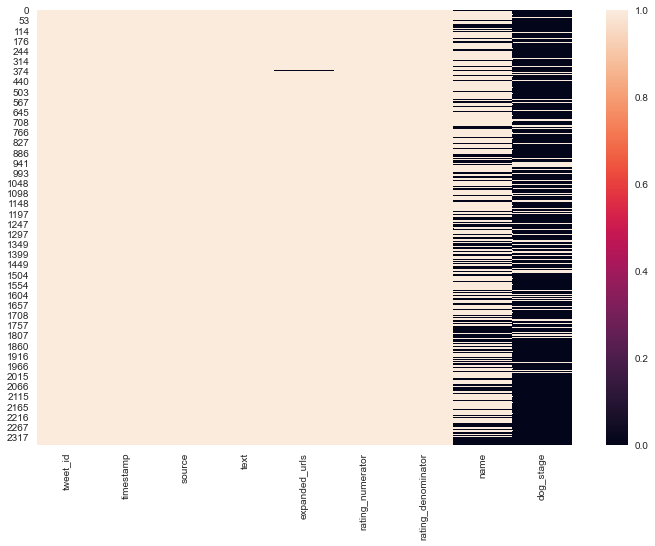

In [530]:
# black = NaNs
plt.figure(figsize = (12,8))
sns.heatmap(tw.notna())
plt.show()

## only_dogs table

### Define 

remove all 324 data points that are definitely not dogs (all p's=False)

### Code 

In [531]:
only_dogs = df_pred.copy()

In [532]:
# drop all rows that are not dogs
condition = ((only_dogs.p1_dog==False) & (only_dogs.p2_dog==False) & (only_dogs.p3_dog==False))
only_dogs.drop(only_dogs[condition].index, inplace=True)



### Test

In [533]:
only_dogs.shape

(1751, 12)

In [534]:
# only_dogs.p1.value_counts().index.to_list()

In [535]:
only_dogs.p1.nunique()

215

### Define

remove underscores and capitalise dog breeds (p1,p2 and p3 columns)



### Code

In [536]:
only_dogs.p1 = only_dogs.p1.str.replace('_', ' ').str.title()
only_dogs.p2 = only_dogs.p2.str.replace('_', ' ').str.title()
only_dogs.p3 = only_dogs.p3.str.replace('_', ' ').str.title()

### Test

In [537]:
print(only_dogs.p1.sample(5))
print(only_dogs.p2.sample(5))
print(only_dogs.p3.sample(5))

1982    Labrador Retriever
1678        Cocker Spaniel
1778            Weimaraner
41      Labrador Retriever
913                 Kuvasz
Name: p1, dtype: object
1587           Shih-Tzu
1101              Dingo
1362            Samoyed
1418      Border Collie
1014    Tibetan Mastiff
Name: p2, dtype: object
1550                         Kuvasz
1593                        Basenji
1001    West Highland White Terrier
892                      Eskimo Dog
2016                 Cocker Spaniel
Name: p3, dtype: object


### Define

from what i know abt ML 100% confidence is not valid so i will remove any data point with 1 confidence 

### Code

technically this is only a test

### Test

no data point in the table with 1 confidence. It was removed when we dropped objects that are not dogs

In [538]:
only_dogs.loc[(only_dogs.p1_conf==1) |(only_dogs.p2_conf==1)|(only_dogs.p3_conf == 1), :]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [539]:
only_dogs.isna().sum(axis=0)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

no duplicates in this table either

## Master Table

### Define

join all 3 tables to get a complete table with all relavant info

### Code

In [540]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1396 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


In [541]:
only_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [542]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2090 non-null   int64
 1   favorite_count  2090 non-null   int64
 2   retweet_count   2090 non-null   int64
dtypes: int64(3)
memory usage: 49.1 KB


In [543]:
print(f"tw is: {tw.shape[0]} rows")
print(f"only_dogs is: {only_dogs.shape[0]} rows")
print(f"tweets is: {tweets.shape[0]} rows")

tw is: 2097 rows
only_dogs is: 1751 rows
tweets is: 2090 rows


In [544]:
master = only_dogs.copy()

In [545]:
tw_copy = tw.copy()

In [546]:
tweets_copy = tweets.copy()

In [547]:
master = master.merge(tw_copy,how='inner', on='tweet_id')

In [548]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   int64              
 1   jpg_url             1666 non-null   object             
 2   img_num             1666 non-null   int64              
 3   p1                  1666 non-null   object             
 4   p1_conf             1666 non-null   float64            
 5   p1_dog              1666 non-null   bool               
 6   p2                  1666 non-null   object             
 7   p2_conf             1666 non-null   float64            
 8   p2_dog              1666 non-null   bool               
 9   p3                  1666 non-null   object             
 10  p3_conf             1666 non-null   float64            
 11  p3_dog              1666 non-null   bool               
 12  timestamp           1666 non-null 

In [549]:
master = master.merge(tweets_copy,how='inner', on='tweet_id')

In [550]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1659 non-null   int64              
 1   jpg_url             1659 non-null   object             
 2   img_num             1659 non-null   int64              
 3   p1                  1659 non-null   object             
 4   p1_conf             1659 non-null   float64            
 5   p1_dog              1659 non-null   bool               
 6   p2                  1659 non-null   object             
 7   p2_conf             1659 non-null   float64            
 8   p2_dog              1659 non-null   bool               
 9   p3                  1659 non-null   object             
 10  p3_conf             1659 non-null   float64            
 11  p3_dog              1659 non-null   bool               
 12  timestamp           1659 non-null 

In [551]:
master.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage', 'favorite_count', 'retweet_count'],
      dtype='object')

### Define

Drop all unimportant columns

### Code

In [552]:
master = master.drop(['jpg_url', 'img_num', 'source','rating_denominator'], axis=1)

### Test

In [553]:
master.sample()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
1390,823581115634085888,Dingo,0.280949,False,German Shepherd,0.194044,True,Pembroke,0.120051,True,2017-01-23 17:20:14+00:00,This is Crawford. He's quite h*ckin good at th...,https://twitter.com/dog_rates/status/823581115...,11,Crawford,NaN,12780,2568


In [554]:
# master.iloc[1567, 12]

### Define

if any of `p1_dog` or `p1_dog` or `p1_dog` == True set the respecrive p1/p2/p3 as the dog breed for that datapoint

### Code

In [555]:

mask1 = (master.p1_dog == True)
master['breed'] = master.loc[mask1]['p1']


mask2 = ((master.p1_dog == False) & (master.p2_dog == True))
master['breed2'] = master.loc[mask2]['p2']


mask3 = ((master.p1_dog == False) & (master.p2_dog == False) & (master.p3_dog == True))
master['breed3'] = master.loc[mask3]['p3']


# master

In [556]:
master.tail()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,...,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,breed,breed2,breed3
1654,891087950875897856,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,...,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,NaN,18501,2743,Chesapeake Bay Retriever,NaN,NaN
1655,891327558926688256,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,...,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,36721,8173,Basset,NaN,NaN
1656,891689557279858688,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,...,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,38467,7595,NaN,Labrador Retriever,NaN
1657,891815181378084864,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,22884,3645,Chihuahua,NaN,NaN
1658,892177421306343426,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,...,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,30437,5518,Chihuahua,NaN,NaN


In [557]:
# mask = ((master.p1_dog == True) & (master.p2_dog == True)& (master.p3_dog == True))

# master.loc[mask]

In [558]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1659 non-null   int64              
 1   p1                1659 non-null   object             
 2   p1_conf           1659 non-null   float64            
 3   p1_dog            1659 non-null   bool               
 4   p2                1659 non-null   object             
 5   p2_conf           1659 non-null   float64            
 6   p2_dog            1659 non-null   bool               
 7   p3                1659 non-null   object             
 8   p3_conf           1659 non-null   float64            
 9   p3_dog            1659 non-null   bool               
 10  timestamp         1659 non-null   datetime64[ns, UTC]
 11  text              1659 non-null   object             
 12  expanded_urls     1659 non-null   object             
 13  rat

In [559]:
master.breed.replace(np.nan, '', inplace=True)
master.breed2.replace(np.nan, '', inplace=True)
master.breed3.replace(np.nan, '', inplace=True)


In [560]:
master.breed = master.breed + master.breed2 + master.breed3

### Test

In [561]:
master.tail()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,...,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,breed,breed2,breed3
1654,891087950875897856,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,...,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,NaN,18501,2743,Chesapeake Bay Retriever,,
1655,891327558926688256,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,...,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,36721,8173,Basset,,
1656,891689557279858688,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,...,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,38467,7595,Labrador Retriever,Labrador Retriever,
1657,891815181378084864,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,22884,3645,Chihuahua,,
1658,892177421306343426,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,...,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,30437,5518,Chihuahua,,


In [562]:
master.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1659 non-null   int64              
 1   p1                1659 non-null   object             
 2   p1_conf           1659 non-null   float64            
 3   p1_dog            1659 non-null   bool               
 4   p2                1659 non-null   object             
 5   p2_conf           1659 non-null   float64            
 6   p2_dog            1659 non-null   bool               
 7   p3                1659 non-null   object             
 8   p3_conf           1659 non-null   float64            
 9   p3_dog            1659 non-null   bool               
 10  timestamp         1659 non-null   datetime64[ns, UTC]
 11  text              1659 non-null   object             
 12  expanded_urls     1659 non-null   object             
 13  rat

In [563]:
master.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'timestamp', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'breed', 'breed2', 'breed3'],
      dtype='object')

### Define

Drop the rest of the irrelevant columns

### Code

In [564]:
master.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'breed2', 'breed3'], axis=1, inplace=True)

### Test

In [565]:
master.sample(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,breed
1306,808501579447930884,2016-12-13 02:39:32+00:00,This is Koda. He dug a hole and then sat in it...,https://twitter.com/dog_rates/status/808501579...,12,Koda,NaN,11187,2575,Airedale
398,676617503762681856,2015-12-15 04:19:18+00:00,I promise this wasn't meant to be a cuteness o...,https://twitter.com/dog_rates/status/676617503...,13,NaN,pupper,2734,902,Chihuahua
477,680801747103793152,2015-12-26 17:25:59+00:00,Great picture here. Dog on the right panicked ...,https://twitter.com/dog_rates/status/680801747...,10,NaN,NaN,2294,784,Pug


# This is the end of the cleaning process!

# Insights & Visualizations

In [566]:
# save master dataframe without index column
master.to_csv("twitter_archive_master.csv", index=False)

In [567]:
df_test = pd.read_csv("twitter_archive_master.csv", )

In [568]:
df_test.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count,breed
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,NaN,NaN,2338,445,Welsh Springer Spaniel
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,NaN,NaN,118,41,Redbone
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,NaN,NaN,107,39,German Shepherd
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,NaN,NaN,261,122,Rhodesian Ridgeback
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,NaN,NaN,94,38,Miniature Pinscher


<AxesSubplot:>

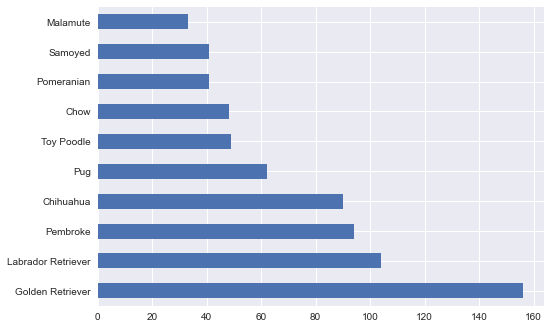

In [569]:
# 10 most tweeted abt dog breeds
master['breed'].value_counts()[:10].plot(kind='barh')


<AxesSubplot:>

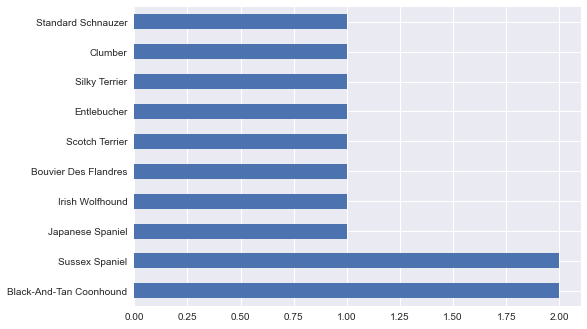

In [570]:
# 10 least tweeted abt dog breeds
master['breed'].value_counts()[-10:].plot(kind='barh')



In [571]:
master.breed.mode()

0    Golden Retriever
dtype: object

In [572]:
master.breed.value_counts()

Golden Retriever      156
Labrador Retriever    104
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Scotch Terrier          1
Entlebucher             1
Silky Terrier           1
Clumber                 1
Standard Schnauzer      1
Name: breed, Length: 113, dtype: int64

Golden Retriever is the most rated/popular dog breed

113 unique dog breeds in this data set

In [573]:
master.breed.nunique()

113

In [574]:
master.rating_numerator.value_counts()

12     419
10     357
11     352
13     217
9      132
8       68
7       32
14      21
6       16
5       14
4        7
3        5
2        2
144      1
1        1
165      1
24       1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
0        1
Name: rating_numerator, dtype: int64

In [575]:
x = master.groupby(by='breed').mean().copy()

In [576]:
x.sort_values(by='favorite_count', ascending=False)

,tweet_id,rating_numerator,favorite_count,retweet_count
breed,,,,
Bedlington Terrier,7.843395e+17,10.333333,22468.833333,7063.166667
Saluki,8.315403e+17,12.500000,21633.500000,4354.250000
French Bulldog,7.851394e+17,11.166667,18243.766667,4643.000000
Bouvier Des Flandres,8.612885e+17,13.000000,16010.000000,3776.000000
Afghan Hound,8.041621e+17,9.666667,15317.666667,5034.333333
...,...,...,...,...
Tibetan Terrier,6.973258e+17,9.250000,1631.000000,470.500000
Irish Wolfhound,6.717356e+17,11.000000,1348.000000,697.000000
Japanese Spaniel,6.773010e+17,5.000000,1174.000000,382.000000


on average, Bedlington Terrier has highest favorites count while Brabancon Griffon has lowest favorite count

In [577]:
x.sort_values(by='retweet_count', ascending=False)

,tweet_id,rating_numerator,favorite_count,retweet_count
breed,,,,
Bedlington Terrier,7.843395e+17,10.333333,22468.833333,7063.166667
Afghan Hound,8.041621e+17,9.666667,15317.666667,5034.333333
Standard Poodle,7.406170e+17,10.727273,12449.181818,4714.909091
French Bulldog,7.851394e+17,11.166667,18243.766667,4643.000000
English Springer,7.153015e+17,10.500000,12634.300000,4628.700000
...,...,...,...,...
Entlebucher,6.798621e+17,11.000000,2374.000000,591.000000
Tibetan Terrier,6.973258e+17,9.250000,1631.000000,470.500000
Japanese Spaniel,6.773010e+17,5.000000,1174.000000,382.000000


on average, Bedlington Terrier has highest retweet count while Brabancon Griffon has retweet count

In [578]:
x.sort_values(by='rating_numerator', ascending=False)

,tweet_id,rating_numerator,favorite_count,retweet_count
breed,,,,
Clumber,7.780270e+17,27.000000,6456.000000,1570.000000
Soft-Coated Wheaten Terrier,7.044397e+17,21.357143,3026.214286,898.000000
West Highland White Terrier,7.235322e+17,14.687500,5413.562500,1254.000000
Great Pyrenees,7.390970e+17,14.666667,10967.133333,3804.666667
Chow,7.473842e+17,14.166667,8460.770833,2356.770833
...,...,...,...,...
Ibizan Hound,6.844888e+17,9.250000,2858.750000,1250.250000
Tibetan Terrier,6.973258e+17,9.250000,1631.000000,470.500000
Scotch Terrier,6.892838e+17,9.000000,3154.000000,1060.000000


on average, Clumber is highest rated (27/10) while Japanese Spaniel is lowest rated (5/10)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


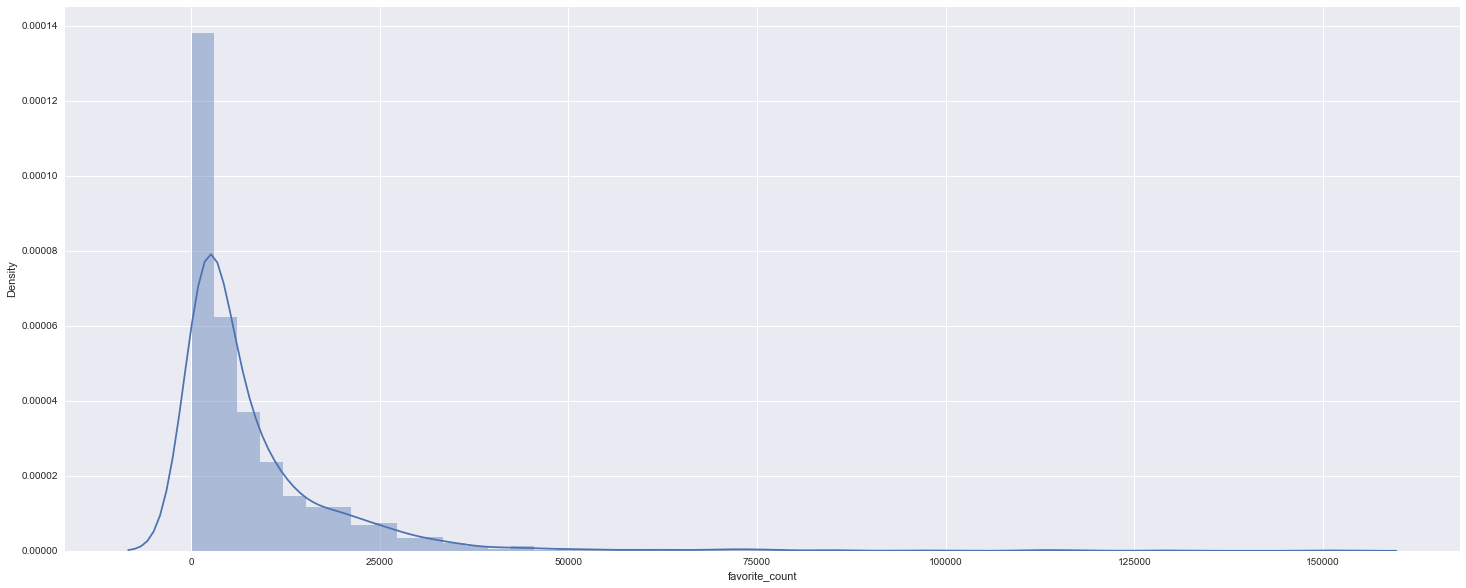

In [579]:
plt.figure(figsize = (25,10))
sns.distplot(master.favorite_count)
plt.show()

In [580]:
master.favorite_count.mean()

8390.63471971067

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


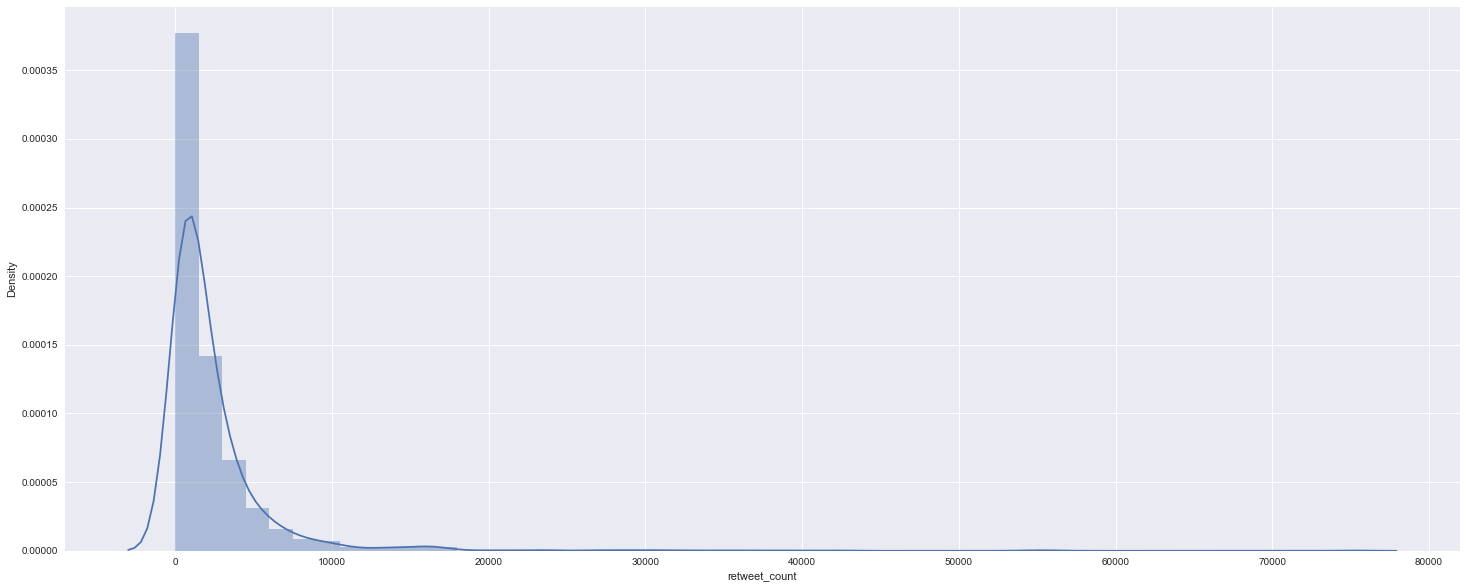

In [581]:
plt.figure(figsize = (25,10))
sns.distplot(master.retweet_count, norm_hist=True)
plt.show()

In [582]:
master.retweet_count.mean()

2425.4653405666063

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


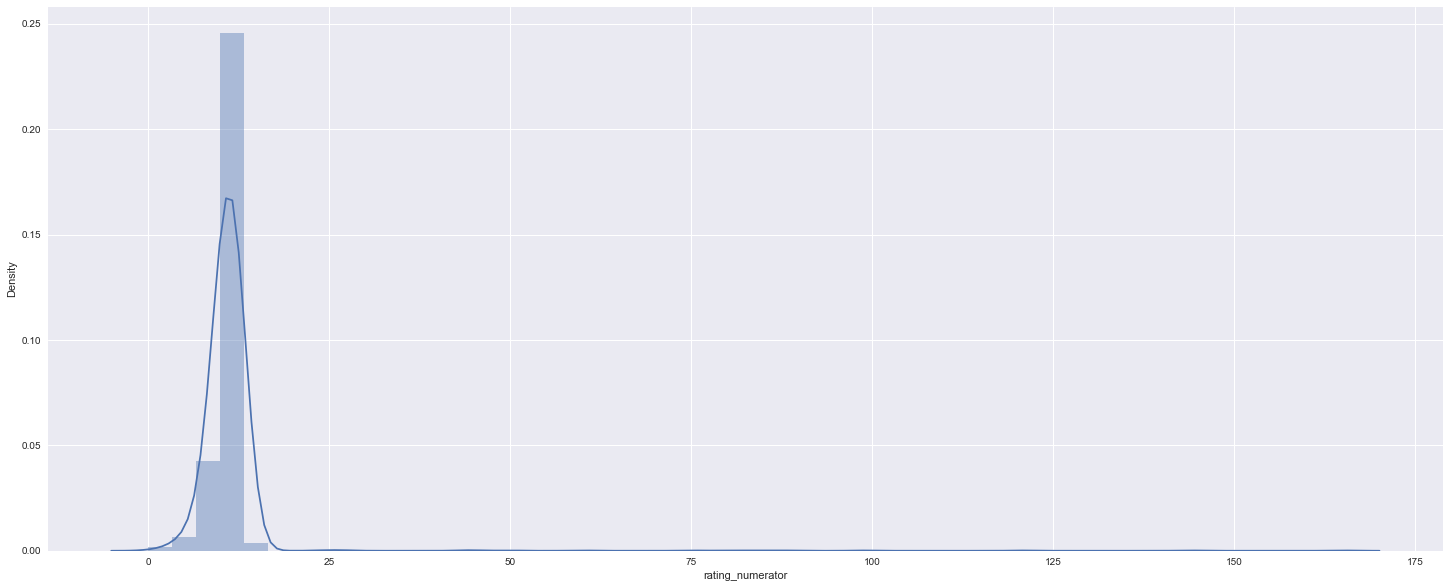

In [583]:
plt.figure(figsize = (25,10))
sns.distplot(master.rating_numerator)
plt.show()

In [584]:
master.rating_numerator.mean()

11.384569017480409

average rating for any dog is 11.4 out of 10

In [585]:
name_df = master.groupby(by='name').mean().copy()

In [586]:
name_df.sort_values(by='favorite_count', ascending=False)

,tweet_id,rating_numerator,favorite_count,retweet_count
name,,,,
Stephan,8.071068e+17,13.0,116832.0,54622.0
Jamesy,8.664507e+17,13.0,113216.0,31853.0
Duddles,8.794158e+17,13.0,96570.0,39349.0
Aja,8.777365e+17,13.0,72366.0,16709.0
Lilly,8.305833e+17,13.0,65288.0,16270.0
...,...,...,...,...
Lugan,6.667393e+17,10.0,218.0,60.0
Jockson,6.668044e+17,8.0,216.0,84.0
Keet,6.670622e+17,10.0,203.0,47.0


Stephan is the most favorited dog name while Christoper is the least

In [588]:
name_df.sort_values(by='retweet_count', ascending=False)

,tweet_id,rating_numerator,favorite_count,retweet_count
name,,,,
Stephan,8.071068e+17,13.0,116832.0,54622.0
Duddles,8.794158e+17,13.0,96570.0,39349.0
Jamesy,8.664507e+17,13.0,113216.0,31853.0
Hurley,6.794628e+17,11.0,30277.0,17916.0
Aja,8.777365e+17,13.0,72366.0,16709.0
...,...,...,...,...
Marvin,6.685678e+17,11.0,222.0,49.0
Kollin,6.695676e+17,9.0,219.0,48.0
Keet,6.670622e+17,10.0,203.0,47.0


Stephan is the most retweeted dog name while Bloo is the least

<AxesSubplot:>

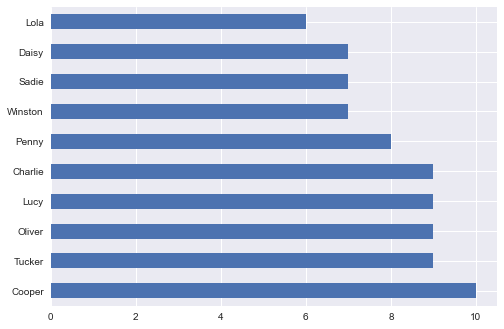

In [587]:
master['name'].value_counts()[:10].plot(kind='barh')



<AxesSubplot:>

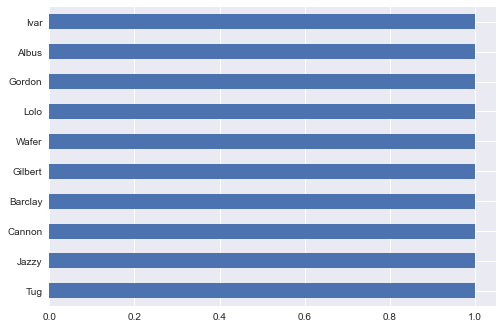

In [591]:
master['name'].value_counts()[-10:].plot(kind='barh')

